In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

In [2]:
import pickle

X_train = pickle.load(open("../data/processed/X_train.p", "rb"))
Y_train = pickle.load(open("../data/processed/Y_train.p", "rb"))

X_test = pickle.load(open("../data/processed/X_test.p", "rb"))
Y_test = pickle.load(open("../data/processed/Y_test.p", "rb"))

In [3]:
X_folds_train = pickle.load(open("../data/processed/X_folds_train.p", "rb"))
Y_folds_train = pickle.load(open("../data/processed/Y_folds_train.p", "rb"))

X_folds_test = pickle.load(open("../data/processed/X_folds_test.p", "rb"))
Y_folds_test = pickle.load(open("../data/processed/Y_folds_test.p", "rb"))

In [4]:
X_strat_folds_train = pickle.load(open("../data/processed/X_strat_folds_train.p", "rb"))
Y_strat_folds_train = pickle.load(open("../data/processed/Y_strat_folds_train.p", "rb"))

X_strat_folds_test = pickle.load(open("../data/processed/X_strat_folds_test.p", "rb"))
Y_strat_folds_test = pickle.load(open("../data/processed/Y_strat_folds_test.p", "rb"))

In [5]:
max_iter = 10e2
C=1.0
penalty='l2'

In [6]:
# Normal Train and Test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter)

soln = model.fit(X_train,Y_train)

print("train_acc = " + str(soln.score(X_train,Y_train))) # train accuracy
print("test_acc = " + str(soln.score(X_test,Y_test) ))# train accuracy

train_acc = 0.9980685659101883
test_acc = 0.6908396946564885


In [8]:
# Train on folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter)
    soln = model.fit(X_folds_train[i], Y_folds_train[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_folds_train[i], Y_folds_train[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_folds_test[i], Y_folds_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))

completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


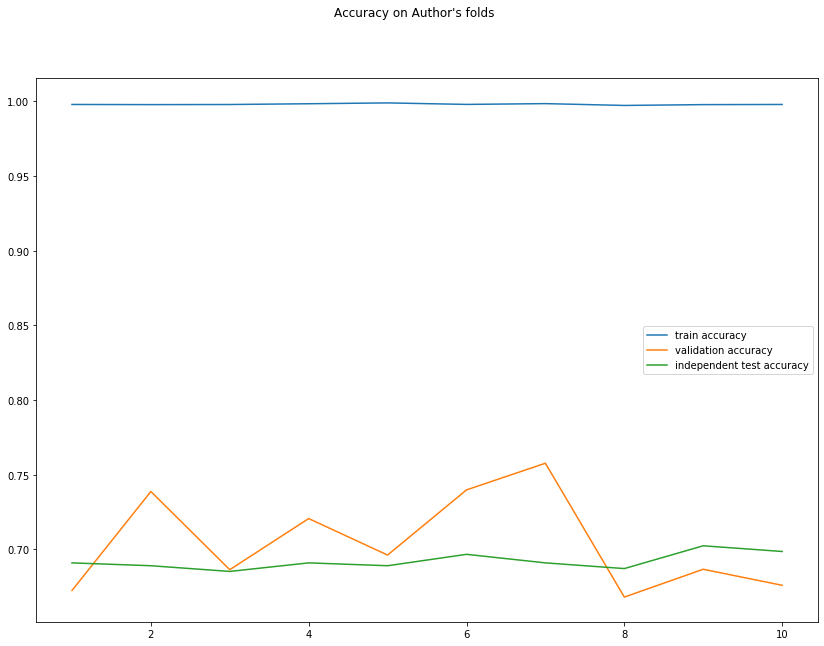

In [9]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on Author\'s folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show()

In [10]:
# train on STRATIFIED folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter)
    soln = model.fit(X_strat_folds_train[i], Y_strat_folds_train[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_strat_folds_train[i], Y_strat_folds_train[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_strat_folds_test[i], Y_strat_folds_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))
    


completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


<function matplotlib.pyplot.show(*args, **kw)>

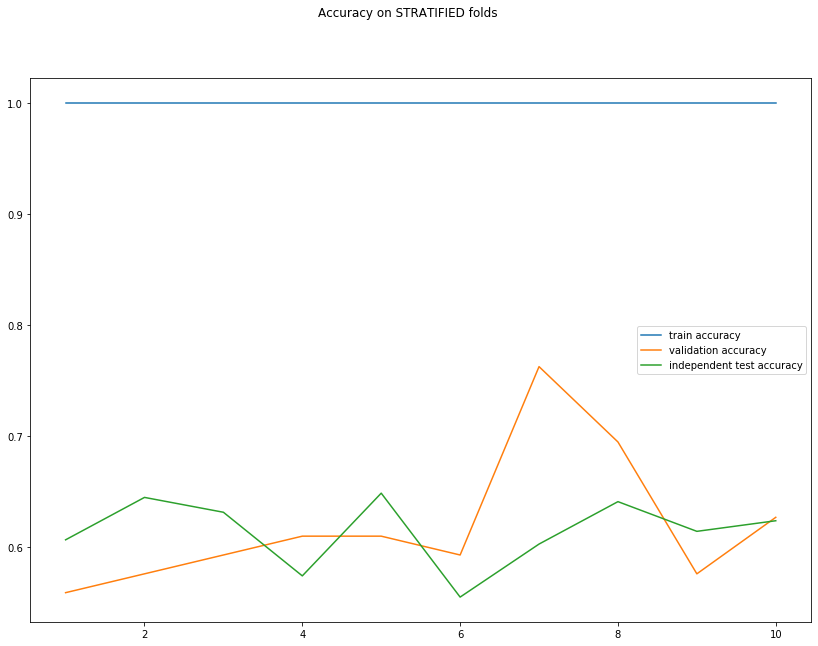

In [11]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on STRATIFIED folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show

In [12]:
print(indep_test_acc)


[0.60687023 0.64503817 0.63167939 0.57442748 0.64885496 0.55534351
 0.60305344 0.64122137 0.61450382 0.6240458 ]
